In [1]:
import sys 
import os

if 'fast_shapelets' not in [el.split('/')[-1] for el in sys.path]:
    curr_path = os.getcwd()
    sys.path.append('/'.join((curr_path.split('/')[:-1])))

In [10]:
from src import get_dataset, SAX

import numpy as np
import matplotlib.pyplot as plt

In [4]:
X_train,y_train, X_test, y_test = get_dataset('StarLightCurves')

Dataset StarLightCurves loading from cache 



In [5]:
sax = SAX()

In [12]:
X_tranform = sax.transform(X_train[:100, 1:])

(100, 15, 16)


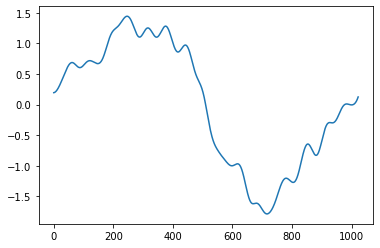

In [19]:
plt.plot((X_train[34, 1:] - np.mean(X_train[34, 1:]))/np.std(X_train[34, 1:]))

In [20]:
np.unique(X_tranform[87])

array(['dddddaaaaabbcccc', 'dddddbaaaabbcccc'], dtype='<U16')